### Importación de datos



In [16]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación


Sumatoria total por producto en cada una de las tiendas

In [2]:
Ventas_Tienda = tienda['Precio'].sum()
Ventas_Tienda_2 = tienda2['Precio'].sum()
Ventas_Tienda_3 = tienda3['Precio'].sum()
Ventas_Tienda_4 = tienda4['Precio'].sum()

lista_tiendas = [
    ("Tienda", Ventas_Tienda),
    ("Tienda 2", Ventas_Tienda_2),
    ("Tienda 3", Ventas_Tienda_3),
    ("Tienda 4", Ventas_Tienda_4)
]

for nombre, ventas in lista_tiendas:
    print(f" -La {nombre} vende: {ventas:,.0f} pesos")


 -La Tienda vende: 1,150,880,400 pesos
 -La Tienda 2 vende: 1,116,343,500 pesos
 -La Tienda 3 vende: 1,098,019,600 pesos
 -La Tienda 4 vende: 1,038,375,700 pesos


# 2. Ventas por categoría

Segmentación por cada una de las categorias

In [3]:
# Consolidación de las bases de datos en una sola data
Base_Total_Tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Segmentación por categoría y sumamos las ventas
sumatoria_por_categoria = Base_Total_Tiendas.groupby('Categoría del Producto')['Precio'].sum()

# Resultado con separador de miles
print("Ventas totales por categoría para todas las tiendas es: ")
print()
for categoria, total in sumatoria_por_categoria.items():
    print(f"  - {categoria}: {total:,.0f} pesos")

# Se presenta categoría con mayor y menor volumen de ventas

Categoria_con_mayor_venta = sumatoria_por_categoria.idxmax()
Valor_mayor = sumatoria_por_categoria.max()

Categoria_con_menor_venta = sumatoria_por_categoria.idxmin()
Valor_menor = sumatoria_por_categoria.min()

print()
print(f"El producto con > ventas es: {Categoria_con_mayor_venta} con un valor de: {Valor_mayor:,.0f} pesos")
print(f"El producto con < ventas es: {Categoria_con_menor_venta} con un valor de: {Valor_menor:,.0f} pesos")


Ventas totales por categoría para todas las tiendas es: 

  - Artículos para el hogar: 57,579,800 pesos
  - Deportes y diversión: 142,977,700 pesos
  - Electrodomésticos: 1,324,751,100 pesos
  - Electrónicos: 1,660,576,500 pesos
  - Instrumentos musicales: 348,772,600 pesos
  - Juguetes: 73,604,400 pesos
  - Libros: 37,696,100 pesos
  - Muebles: 757,661,000 pesos

El producto con > ventas es: Electrónicos con un valor de: 1,660,576,500 pesos
El producto con < ventas es: Libros con un valor de: 37,696,100 pesos


# 3. Calificación promedio de la tienda


In [20]:
# Cliclo for, para el caluculo del promedio de la calificación por tienda
Tiendas = [tienda, tienda2, tienda3, tienda4]

lista_tiendas = [
    ("Tienda", Ventas_Tienda),
    ("Tienda 2", Ventas_Tienda_2),
    ("Tienda 3", Ventas_Tienda_3),
    ("Tienda 4", Ventas_Tienda_4)
]


for i in Tiendas:
  Calificacion_por_tienda =(i['Calificación'].mean())
  print(f"-  La calificación promedio de la tienda es: {Calificacion_por_tienda:,.2f}")


-  La calificación promedio de la tienda Tienda es: 3.98
-  La calificación promedio de la tienda Tienda es: 4.04
-  La calificación promedio de la tienda Tienda es: 4.05
-  La calificación promedio de la tienda Tienda es: 4.00


# 4. Productos más y menos vendidos

In [5]:
# Lista de productos únicos
lista_productos = Base_Total_Tiendas['Producto'].unique()

# Sumatoria total por producto
sumatoria_ventas_por_producto = Base_Total_Tiendas.groupby('Producto')['Precio'].sum()

# Producto con mayores y menores ventas
nombre_prodcuto_mayor_venta = sumatoria_ventas_por_producto.idxmax()
nombre_prodcuto_menor_venta = sumatoria_ventas_por_producto.idxmin()

# Sumatoria del precio del producto con mayores y menores ventas

valor_producto_con_mayores_ventas = sumatoria_por_categoria.max()
valor_producto_con_menores_ventas = sumatoria_por_categoria.min()

print(f"- El producto con mayor venta es: {nombre_prodcuto_mayor_venta} {valor_producto_con_mayores_ventas:,.0f} pesos")
print(f"- El producto con menor venta es: {nombre_prodcuto_menor_venta} {valor_producto_con_menores_ventas:,.0f} pesos")


- El producto con mayor venta es: TV LED UHD 4K 1,660,576,500 pesos
- El producto con menor venta es: Cubo mágico 8x8 37,696,100 pesos


# 5. Envío promedio por tienda

In [21]:
# Cálculo del costo total por tienda
costo_de_envio_Tienda = tienda['Costo de envío'].sum()
costo_de_envio_Tienda_2 = tienda2['Costo de envío'].sum()
costo_de_envio_Tienda_3 = tienda3['Costo de envío'].sum()
costo_de_envio_Tienda_4 = tienda4['Costo de envío'].sum()

lista_tiendas = [
    ("Tienda", costo_de_envio_Tienda),
    ("Tienda 2", costo_de_envio_Tienda_2),
    ("Tienda 3", costo_de_envio_Tienda_3),
    ("Tienda 4", costo_de_envio_Tienda_4)
]
# Impresion del costo total

for nombre, costo_promedio_por_tienda in lista_tiendas:
  print(f"  -La tienda {nombre} tiene un costo promedio de envío de: {costo_promedio_por_tienda:,.0f} pesos")
print()

# Cálculo de la utilidad neta por tienda

Ventas_Tienda = tienda['Precio'].sum()
Ventas_Tienda_2 = tienda2['Precio'].sum()
Ventas_Tienda_3 = tienda3['Precio'].sum()
Ventas_Tienda_4 = tienda4['Precio'].sum()

for i in Tiendas:
  Utilidad_neta_por_tienda = (i['Precio'].sum() - i['Costo de envío'].sum())
  print(f"  -La tienda tiene una utilidad neta de: {Utilidad_neta_por_tienda:,.0f} pesos")





  -La tienda Tienda tiene un costo promedio de envío de: 61,377,900 pesos
  -La tienda Tienda 2 tiene un costo promedio de envío de: 59,485,100 pesos
  -La tienda Tienda 3 tiene un costo promedio de envío de: 58,516,600 pesos
  -La tienda Tienda 4 tiene un costo promedio de envío de: 55,317,400 pesos

  -La tienda tiene una utilidad neta de: 1,089,502,500 pesos
  -La tienda tiene una utilidad neta de: 1,056,858,400 pesos
  -La tienda tiene una utilidad neta de: 1,039,503,000 pesos
  -La tienda tiene una utilidad neta de: 983,058,300 pesos


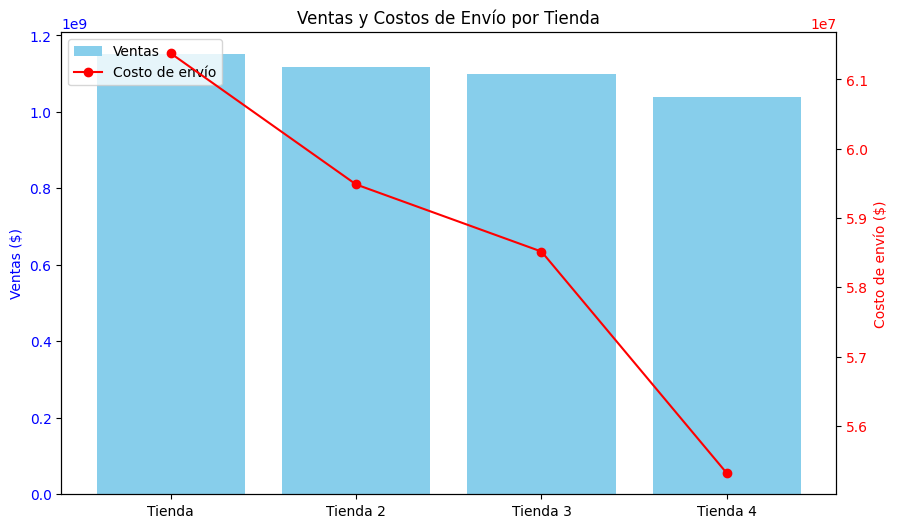

In [7]:
# Listas de datos
nombres_tiendas = ['Tienda', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas = [Ventas_Tienda, Ventas_Tienda_2, Ventas_Tienda_3, Ventas_Tienda_4]
costos_envio = [costo_de_envio_Tienda, costo_de_envio_Tienda_2, costo_de_envio_Tienda_3, costo_de_envio_Tienda_4]

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10,6))

# Graficar las ventas como barras
bars = ax1.bar(nombres_tiendas, ventas, color='skyblue', label='Ventas')

# Configurar el eje Y primario
ax1.set_ylabel('Ventas ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje Y para los costos de envío
ax2 = ax1.twinx()

# Graficar los costos de envío como línea
line = ax2.plot(nombres_tiendas, costos_envio, color='red', marker='o', label='Costo de envío')

# Configurar el eje Y secundario
ax2.set_ylabel('Costo de envío ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título
plt.title('Ventas y Costos de Envío por Tienda')

# Mostrar leyendas
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
ax1.legend(lines_labels, labels, loc='upper left')

# Mostrar la gráfica
plt.show()


#Conclusión

***Como resultado del análisis de los datos anteriormente presentados, se informa al usuario que la tienda que debería ser vendida es la Tienda #4, ya que registra el menor volumen de ventas.
Por otro lado, se destaca que la Tienda #1 es la más rentable; sin embargo, presenta altos costos de envío y una baja calificación por parte de los usuarios.
En este sentido, para incrementar la rentabilidad general, se recomienda reducir los costos de envío y mejorar la experiencia del cliente, lo cual podría traducirse en mayores ingresos a futuro.***